In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter,OrderedDict
import calendar as cld
import warnings

In [90]:
df = pd.read_csv('/home/TE/Downloads/titanic.csv')

In [91]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [92]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [94]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [95]:
df["Embarked"].fillna("S", inplace=True)

Text(0.5, 1.0, 'Fare Frequency')

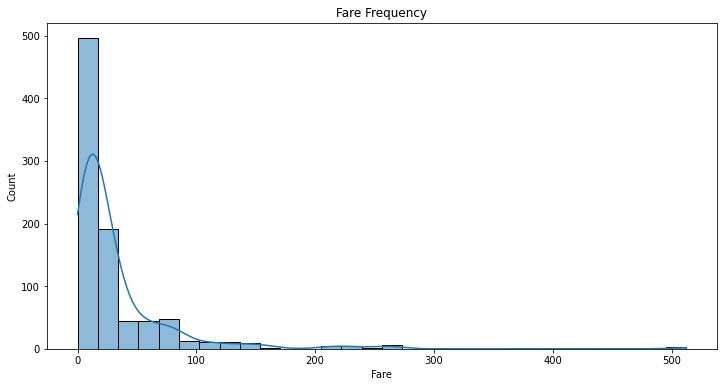

In [96]:
plt.figure(figsize=(12, 6))
sns.histplot(df["Fare"], bins=30, kde=True)
plt.title('Fare Frequency')

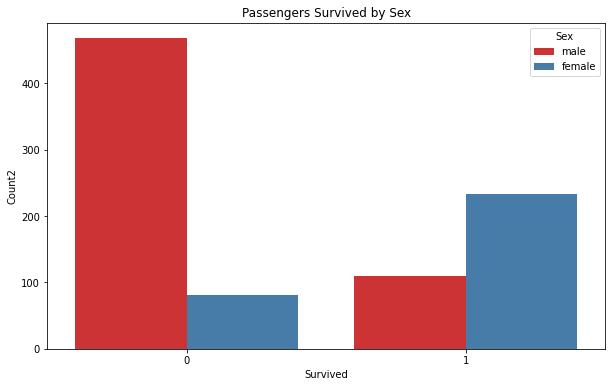

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Sex', data=df, hue_order=['male', 'female'], palette='Set1')
plt.title('Passengers Survived by Sex')
plt.xlabel('Survived')
plt.ylabel('Count2')
plt.show()

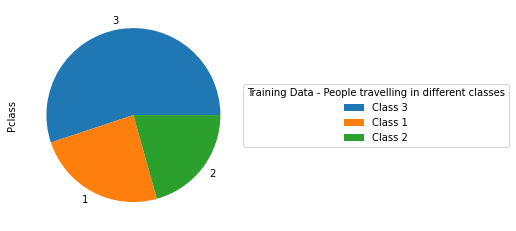

In [98]:
fig_pclass = df.Pclass.value_counts().plot.pie().legend(labels=["Class 3","Class 1","Class 2"], loc='center right', bbox_to_anchor=(2.25, 0.5)).set_title("Training Data - People travelling in different classes")

In [99]:
(df[df.Pclass == 1].Survived == 1).value_counts()

True     136
False     80
Name: Survived, dtype: int64

In [100]:
df[df.Pclass == 1]["Survived"].value_counts()

1    136
0     80
Name: Survived, dtype: int64

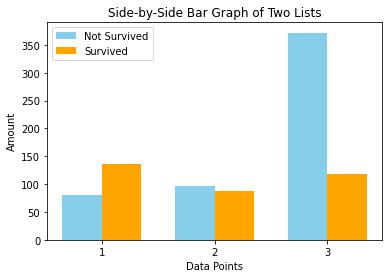

In [101]:
stats1 = df[df.Pclass == 1]["Survived"].value_counts()
stats2 = df[df.Pclass == 2]["Survived"].value_counts()
stats3 = df[df.Pclass == 3]["Survived"].value_counts()

ns = [stats1[0], stats2[0], stats3[0]]
s = [stats1[1], stats2[1], stats3[1]]

x_values = np.arange(len(ns))

width = 0.35
plt.bar(x_values - width/2, ns, width, label='Not Survived', color='skyblue')
plt.bar(x_values + width/2, s, width, label='Survived', color='orange')

# Adding labels, title, and legend
plt.xlabel('Data Points')
plt.ylabel('Amount')
plt.title('Side-by-Side Bar Graph of Two Lists')
plt.xticks(x_values, [str(i) for i in range(1, len(ns) + 1)])
plt.legend()

plt.show()


In [102]:
df['Fare_Category'] = pd.cut(df['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid','High_Mid','High'])


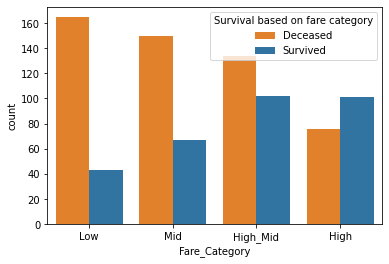

In [103]:
x = sns.countplot(x = "Fare_Category", hue = "Survived", data = df, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])
x.set_title("Survival based on fare category")

<AxesSubplot:>

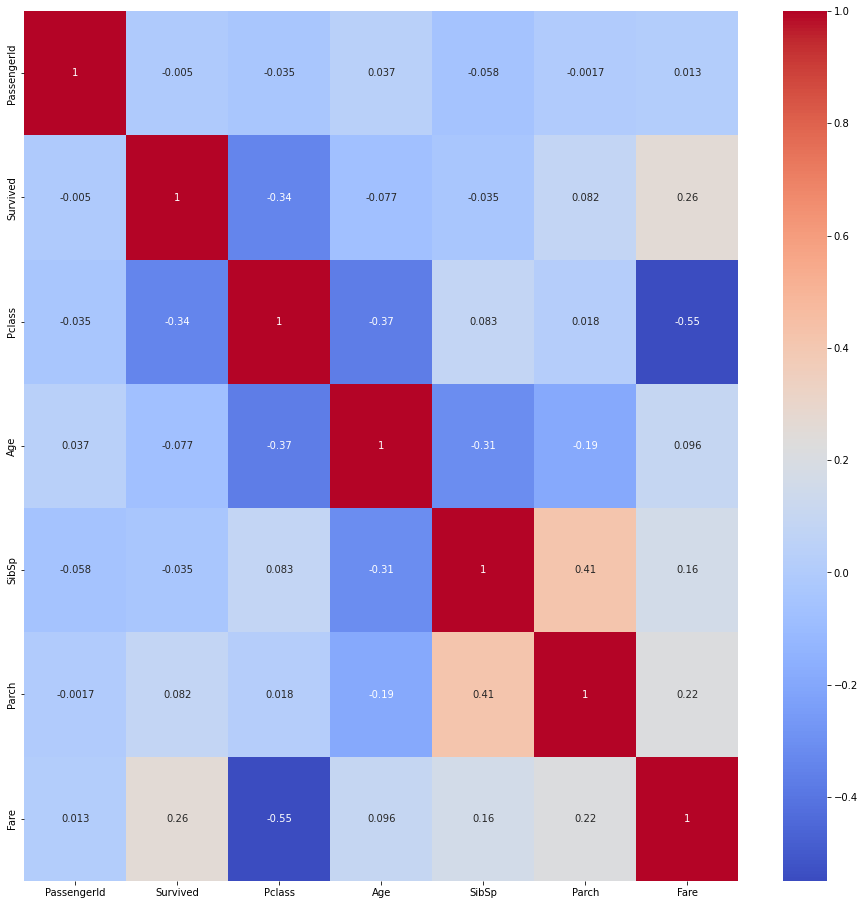

In [104]:
correlation_matrix = df.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')